# Исследовательский проект  интернет-магазина компьютерных игр «Стримчик»

Описание проекта. 
- Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)  до 2016 года. 
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. 
- ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Цель : выявить определяющие успешность игры закономерности.


План работы:
- Загрузить данные
- Произвести предобработку данных. Проверить на пропуски значений, дубликаты, ошибки типов данных.
- Визуализировать и изучить обрботанные данные, выполнить первоначальные наблюдения.
- Произвести расчеты на основе полученных данных, выявить закономерности. Обьединить необходимые таблицы, столбцы, добавить новые
- Проверить необходимые гипотезы, сделать выводы.

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

##  Загрузка данных

In [57]:
try:
    games = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [58]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обнаружены ошибки наименоавний столбцов, пропуски значений, ошибки типов данных.

Выявлены критические пропуски в столбцах  year_of_release, critic_score, user_score, rating
- исследуем данные столбцы, с чем это может быть связано.

Данные таблицы:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Предобработка данных

### Наименования

In [59]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Тип данных

Тип данных в столбце 'Year_of_Release' приведем к формату 'int', чтобы убрать запятую, так как у нас известен только год выпуска.

In [60]:
games.year_of_release = games.year_of_release.astype(float).astype('Int64')

In [61]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Пропуски данных

In [62]:
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Столбец  year_of_release

In [63]:
games['year_of_release'].isna().sum()

269

In [64]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

'<_NA_>' значение.

Как видно, здесь находятся данные за очень большой промежуток времени, можно понять, что это, скорее всего, пропущенные значения архивов, оставим эти пропуски, чтобы могли учитывать эти данные при подсчетах.

Столбец critic_score

In [65]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Выбивающихся значений из данных нет, скорее всего критики рассмотрели не все игры, так как тип данных в формате float, можно производить расчеты. Оставим эти пропуски.

Столбец user_score

In [66]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо значения Nan, есть значение tbd, непонятно с чем это может быть связано, посмотрим сколько таких значений.


In [67]:
games.user_score.isna().sum()

6701

In [68]:
len(games.query('user_score == "tbd"'))

2424

Вероятно, записана какая-то характеристика оценки, заменим эти значения как Nan, и так же, чтобы мы могли производить расчеты на имеющихся данных, переведем тип данных из object в float

In [69]:
games.user_score = games.user_score.replace('tbd',np.nan)
games.user_score = games.user_score.astype(object).astype('float')

In [70]:
games.user_score.isna().sum()

9125

Так как пропусков слишком много, заполнять их 0 не целесообразно, чтобы эти данные не искажали подсчеты, будем работать с тем, что есть.

Столбец rating

In [71]:
games.rating.value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Из полученного результата можно сделать вывод, что основными являются рейтинги "Е","Т","М","Е10+", остальными значениями можно пренебречь, удалим эти строки.

In [72]:
games = games[(games.rating != 'EC') & (games.rating != 'K-A') & (games.rating != 'AO') & (games.rating != 'RP')]

In [73]:
games.rating.value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
Name: count, dtype: int64

Удалены пропуски значений где это возможно, поменяли типы данных на нужные, избавились от лишних значений в столбцах.

### Дубликаты

In [74]:
games.duplicated().sum()

0

Дубликатов не обнаружено

Поправим регистры в данных, для поиска неявных дубликатов.

In [75]:
games.columns = games.columns.str.lower()

In [76]:
games.duplicated().sum()

0

Неявные дубликаты не обнаружены

Провериим совпадения по строкам

In [77]:
duplicateRows = games[games.duplicated ()]
duplicateRows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Не обнаружено

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

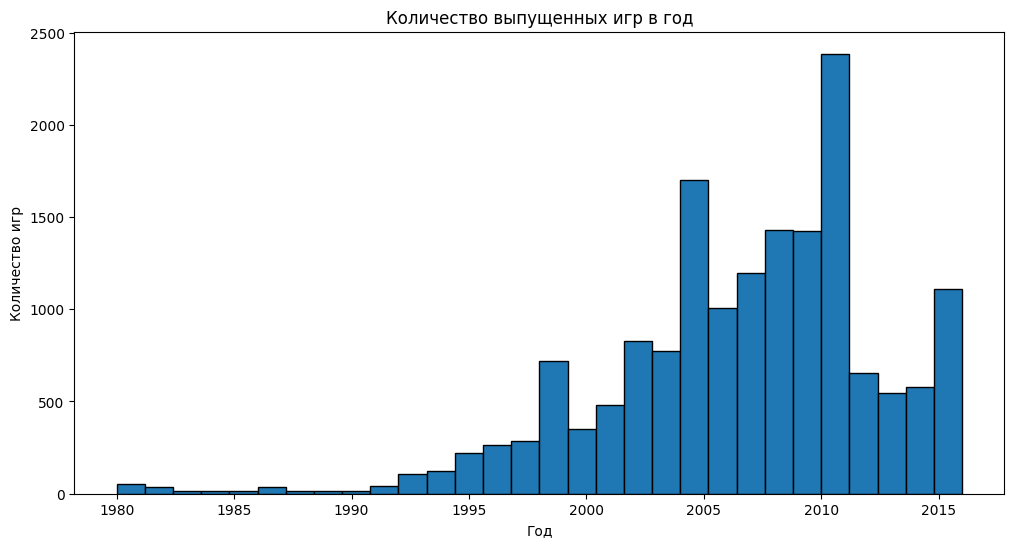

In [78]:
games['year_of_release'].plot(kind='hist', bins=30, ec='black', figsize=(12,6))
plt.title('Количество выпущенных игр в год')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Активное начало выпуска компьютерных игр приходится на 1990 год, пикового значения достигает в 2011, но, для расчетов, потребуется детализация, платформ, и основных показателей данных.
также наблюдаются промежуточные всплески к 1998 году и 2005.

Посмотрим, как менялись продажи по платформам. Создадим столбец  с наибольшими  суммарными продажами  по платформам и построим распределение по годам.

In [79]:
games['sale_sum'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
# games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) 

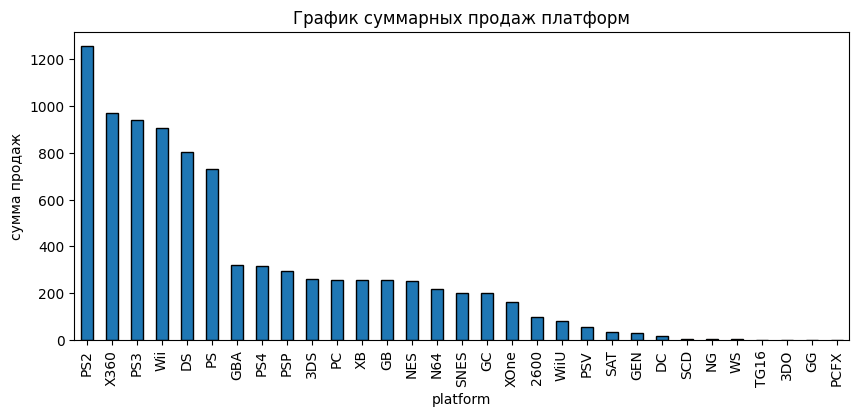

In [80]:
(games.groupby('platform')['sale_sum']
      .sum()
      .sort_values(ascending=False)
 
      .plot(kind='bar',
            figsize=(10,4),
            ec='black'))

plt.title('График суммарных продаж платформ')
plt.ylabel('сумма продаж');

Видно на гистограмме явных фаворитов, можно взять одноименные кампании c высокими значениями суммы продаж и проанализировать их: 
- PS2
- X360
- PS3
- Wii
- DS


Платформа 

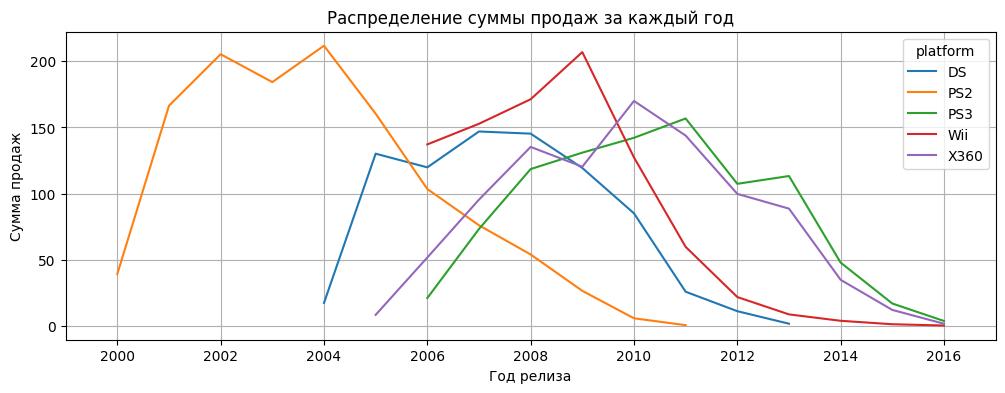

In [81]:
(games[(games.platform == 'PS2') | 
       (games.platform == 'X360')| 
       (games.platform == 'PS3')| 
       (games.platform == 'Wii')| 
       (games.platform == 'DS')]
 
    .pivot_table(index='year_of_release',
                 columns='platform', 
                 values='sale_sum',
                 aggfunc='sum')
 
     .plot(figsize=(12,4), grid=True))

plt.xlim(1999, 2017)
plt.title('Распределение суммы продаж за каждый год')
plt.xlabel('Год релиза')
plt.ylabel('Сумма продаж');

Вывод: 
- Благодаря  графикy можем отметить наблюдение, что большая сумма продаж, для разных платформ сохраняется в среднем в диапазоне от 3 до 5 лет. В таком случае для исследования нам потребуются данные за 4 предидущих года, чтобы сохранить актуальность в настоящее время. Эти данные помогут построить прогноз на 2017 год
- Видно, что все платформы к 2016 году практически перестали продаваться.
-  В целом платформа существует около 9-10 лет.

Обновим датафрейм, возьмем данные за последние 2 года.

In [82]:
games_pl = games[games['year_of_release'] >= 2014].reset_index()

In [83]:
games_pl.year_of_release.unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

In [84]:
games_pl.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_sum
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Проверим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [85]:
games_pl.groupby('platform')['sale_sum'].sum().sort_values()

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: sale_sum, dtype: float64

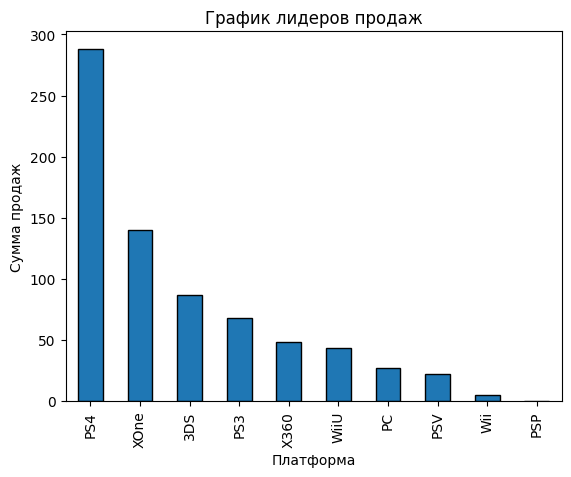

In [86]:
(games_pl.groupby('platform')['sale_sum']
         .sum()
         .sort_values(ascending=False)
 
            .plot(kind='bar', ec='black')) 

plt.title('График лидеров продаж')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж');

Потенциально прибыльные платформы на текущий момент:
- PS4
- PS3
- X360
- 3DS
- XOne

Платформы с минимальной суммой продаж DS и PSP.

Построим график диаграмм размаха прибыльных платформ по продажам игр за актуальный период.

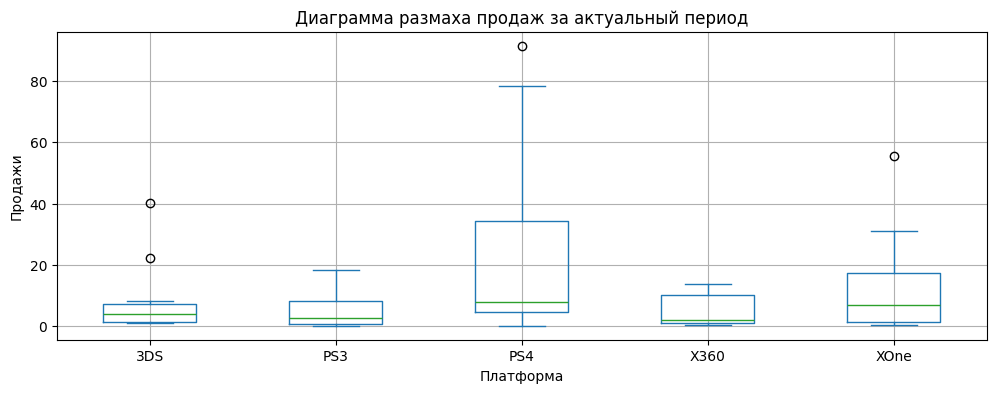

In [87]:
(games_pl[(games_pl.platform == 'PS4') | 
       (games_pl.platform == 'PS3')| 
       (games_pl.platform == 'X360')| 
       (games_pl.platform == '3DS')| 
       (games_pl.platform == 'XOne')]
 
.pivot_table(index='genre',
              columns='platform',
              values='sale_sum',
              aggfunc='sum')

.plot.box(grid=True,
          figsize=(12,4),
          ylabel='Продажи', 
          xlabel='Платформа', 
          title='Диаграмма размаха продаж за актуальный период'));

По медиане каждой платформы можно увидеть лидеров это PS4, XOne , следующая чуть меньше по сумме, 3DS, с низкими показателями остаются PS3 и X360.

Пронаблюдаем как влияют показатели критиков и пользователей, на продажи платформы PS4, посторим диаграмму рассеяния за весь период.

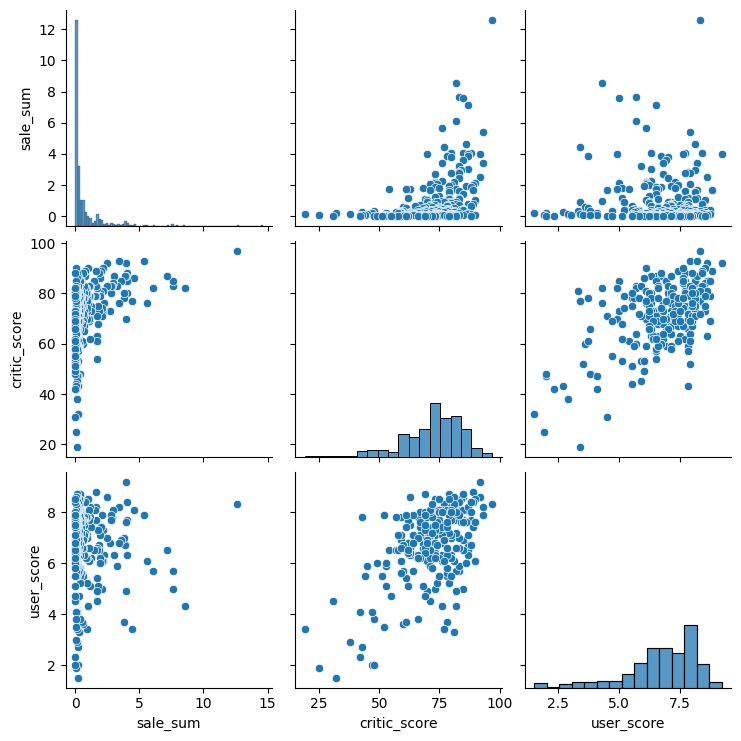

In [88]:
sns.pairplot(games[games['platform']== "PS4"][['sale_sum','critic_score','user_score']]);

Построим таблицу корреляции.

In [89]:
games.query('platform == "PS4"')[['sale_sum','critic_score','user_score']].corr()

,sale_sum,critic_score,user_score
sale_sum,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


На диаграмме видно, что к оценкам критиков продажи начинают повышаться только после оценок 50-60 пунктов, зависимость начинает увеличиваться к 80 пунктам и оказывает хорошее влияние на продажи данной платформы. Также можно отметить, что оценки некоторых пользователей могли привести к точечным повышениям продаж. Еще один факт, оценки критиков коррелируют с оценками пользователей.

Проверим  выводы с продажами игр на других популярных платформах.

XOne

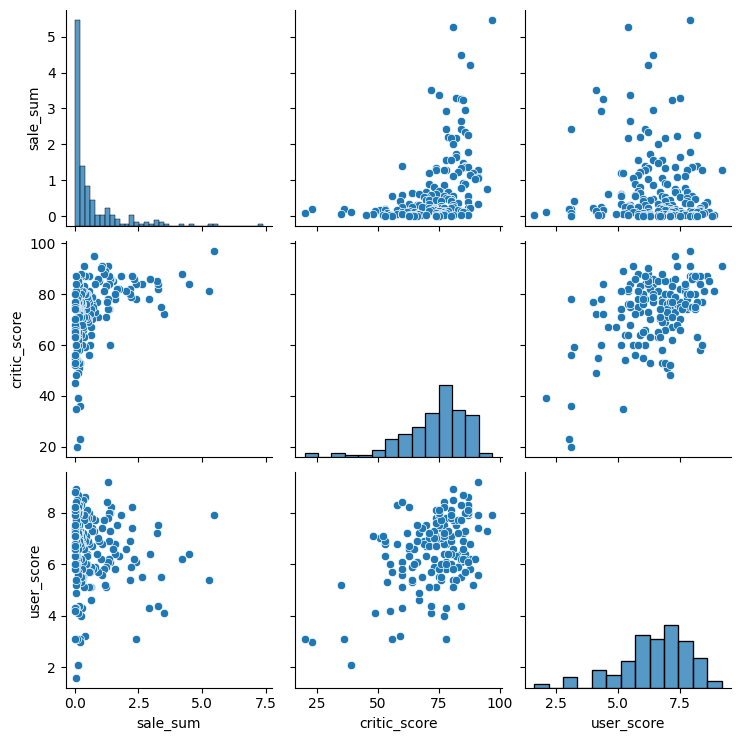

In [90]:
sns.pairplot(games[games['platform']== "XOne"][['sale_sum','critic_score','user_score']]);

In [91]:
games.query('platform == "XOne"')[['sale_sum','critic_score','user_score']].corr()

,sale_sum,critic_score,user_score
sale_sum,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Корреляция суммы продаж к оценкам критиков не высокая, чем выше оценка, тем больше продажи, с оценкой пользователей продажи  остаются почти неизменными.

3DS

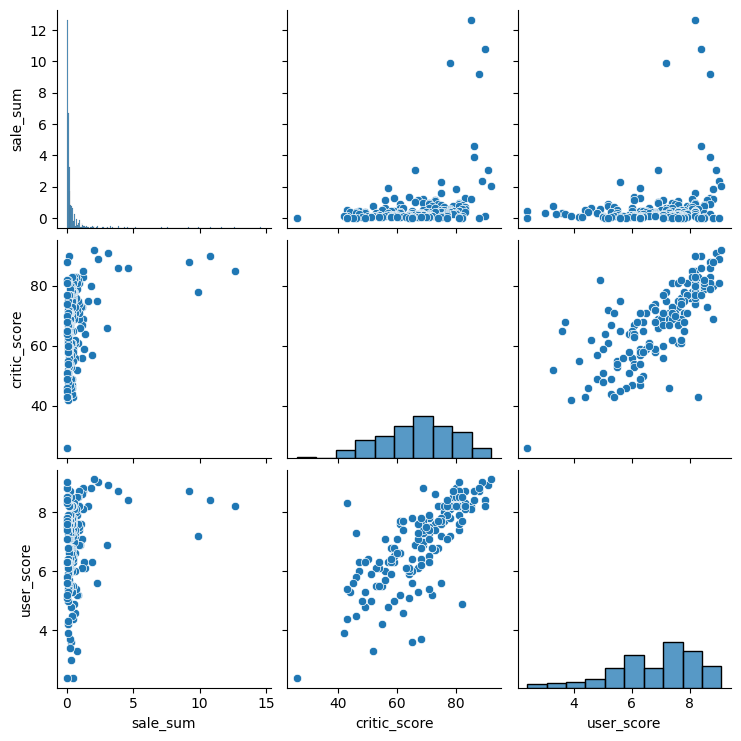

In [92]:
sns.pairplot(games[games['platform']== "3DS"][['sale_sum','critic_score','user_score']]);

In [93]:
games.query('platform == "3DS"')[['sale_sum','critic_score','user_score']].corr()

,sale_sum,critic_score,user_score
sale_sum,1.000000,0.349401,0.224808
critic_score,0.349401,1.000000,0.744168
user_score,0.224808,0.744168,1.000000


Корреляция суммы продаж к оценкам критиков не высокая, чуть меньше идет зависимость с оценкой пользователей, продажи  при этом слабо увеличиваются.

PS3

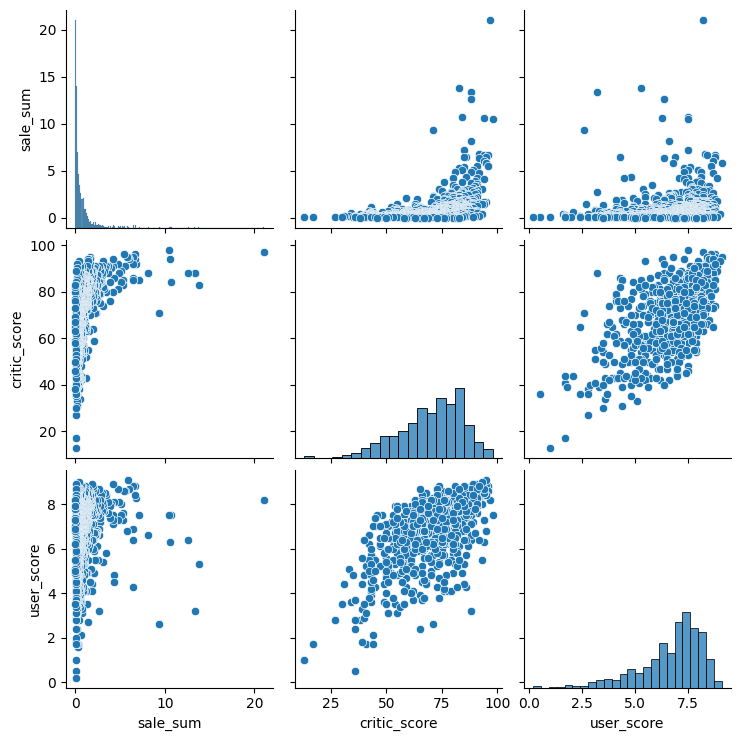

In [94]:
sns.pairplot(games[games['platform']== "PS3"][['sale_sum','critic_score','user_score']]);

In [95]:
games.query('platform == "PS3"')[['sale_sum','critic_score','user_score']].corr()

,sale_sum,critic_score,user_score
sale_sum,1.000000,0.432432,0.126691
critic_score,0.432432,1.000000,0.629005
user_score,0.126691,0.629005,1.000000


X360

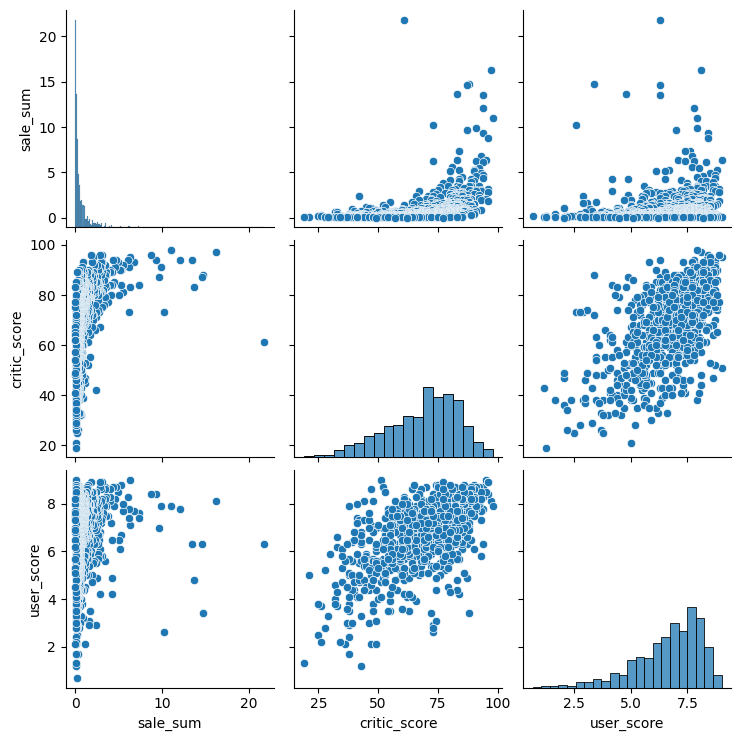

In [96]:
sns.pairplot(games[games['platform']== "X360"][['sale_sum','critic_score','user_score']]);

In [97]:
games.query('platform == "X360"')[['sale_sum','critic_score','user_score']].corr()

,sale_sum,critic_score,user_score
sale_sum,1.000000,0.393736,0.114459
critic_score,0.393736,1.000000,0.618101
user_score,0.114459,0.618101,1.000000


### Общий вывод : 
Видно, что в  платформах зависимость отзывов примерно соотвествует зависимости в самой популярной платформе. Значительных различий нет.

Можно сказать фактически, чем больше оценка критиков и пользователей, тем больше продажи. Это отлично видно на примере всех платформ

Посмотрим на общее распределение игр по жанрам. По средней сумме продаж. 

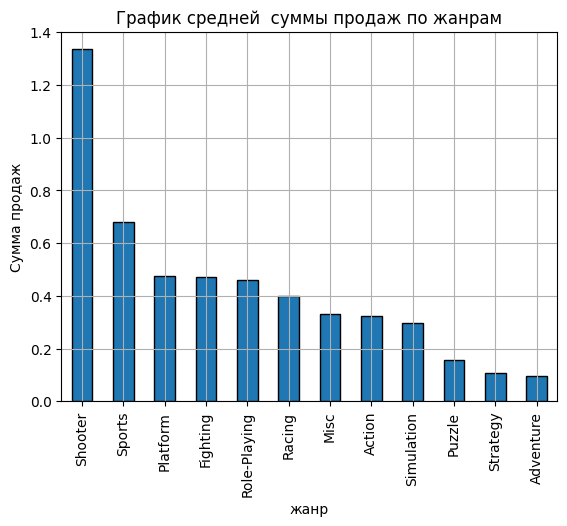

In [98]:
(games_pl.groupby('genre')['sale_sum']
      .mean()
      .sort_values(ascending=False)
 
.plot(kind='bar', 
      ec='black', 
      grid=True))

plt.title('График средней  суммы продаж по жанрам')
plt.ylabel('Сумма продаж')
plt.xlabel('жанр');

В тройку лидеров продаж входят игры с жанрами Shooter, Sports, Plaftform, заметно, что игры жанра Shooter намного выше остальных, дальше идет равномерное снижение к  самым низким показателям продаж это Strategy, Adventure. Разница наблюдается очень высокая.

## Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Определим для пользователей NA региона топ 5 популярных платформ по продажам.

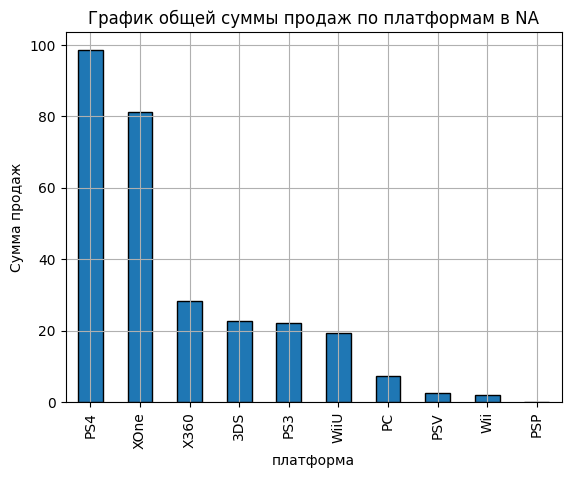

In [99]:
(games_pl.groupby('platform')['na_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по платформам в NA')
plt.ylabel('Сумма продаж')
plt.xlabel('платформа');

Популярность платформ по продажам снижается примерно на 70 пунктов с каждой последующей на снижении.

В топ-5 популярных платформ входят с общей суммой продаж 20-100 пунктов за актуальный период:
- PS4
- Xone
- X360
- 3DS
- PS3

Определим для пользователей NA региона топ 5 популярных жанров по продажам.

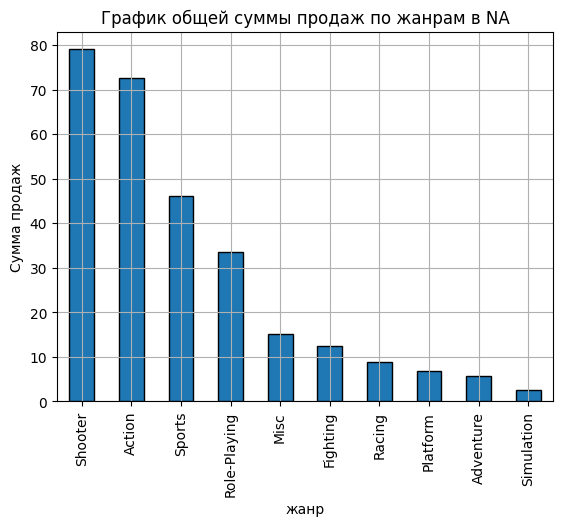

In [100]:
(games_pl.groupby('genre')['na_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по жанрам в NA')
plt.ylabel('Сумма продаж')
plt.xlabel('жанр');

Жанры Shooter и Action сильно лидируют на фоне остальных с общей суммой продаж 70-80 пунктов, последующие жанры по региону выступает Sports. Затем идет плавное снижение по 10-20 пунктов к каждому жанру.

Топ 5 жанров данного региона:
- Shooter
- Action
- Sports
- Role_Playing
- Misc

Влияет ли рейтинг ESRB на продажи в  регионе NA

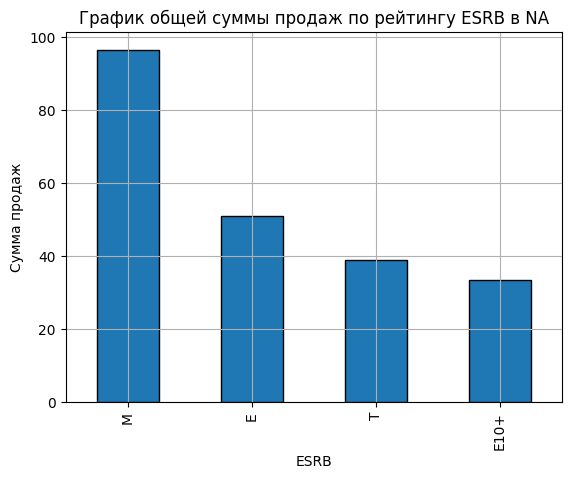

In [101]:
(games_pl.groupby('rating')['na_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)

   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по рейтингу ESRB в NA')
plt.ylabel('Сумма продаж')
plt.xlabel('ESRB');

Заметно что игры с рейтингом "М" явно имеет приемущество на 40 пунктов от следующих "Е" и "Т". "Е10" оказывается на последнем месте по продажам в данном регионе. Судя по всему предпочтительнее является рейтинг игры "М".

Общий портрет данного региона, пользователь, который предпочитает платформу PS4 с жанром игры Shooter и рейтингом "М".

##### Определим для пользователей EU региона топ 5 популярных платформ по продажам.

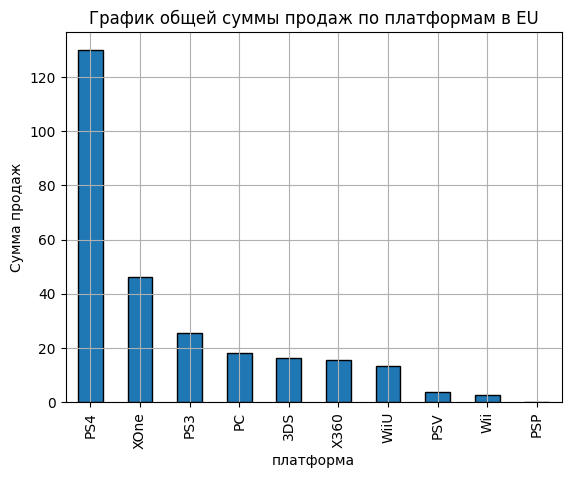

In [102]:
(games_pl.groupby('platform')['eu_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по платформам в EU')
plt.ylabel('Сумма продаж')
plt.xlabel('платформа');

Популярность платформ по продажам снижается примерно на 80 от лидирующей PS4 пунктов с каждой последующей на снижении.

В топ-5 популярных платформ входят с общей суммой продаж  пунктов за весь период:
- PS4
- XOne
- PS3
- PC
- 3DS

Определим для пользователей EU региона топ 5 популярных жанров по продажам.

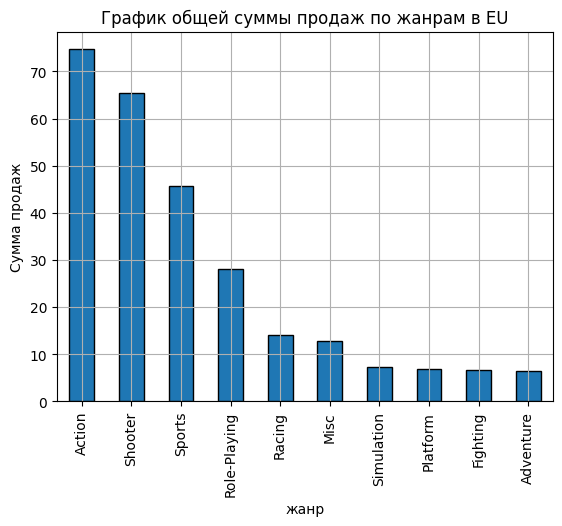

In [103]:
(games_pl.groupby('genre')['eu_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по жанрам в EU')
plt.ylabel('Сумма продаж')
plt.xlabel('жанр');

Жанр Action сильно лидирует на фоне остальных с общей суммой продаж 75 пунктов, вторым жанром по региону выступает Shooter. Затем идет резкое снижение на 20 пунктов к жанру Sports далее наблюдается плавное снижение по 10-15 пунктов.

Топ 5 жанров данного региона:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Влияет ли рейтинг ESRB на продажи в  регионе EU

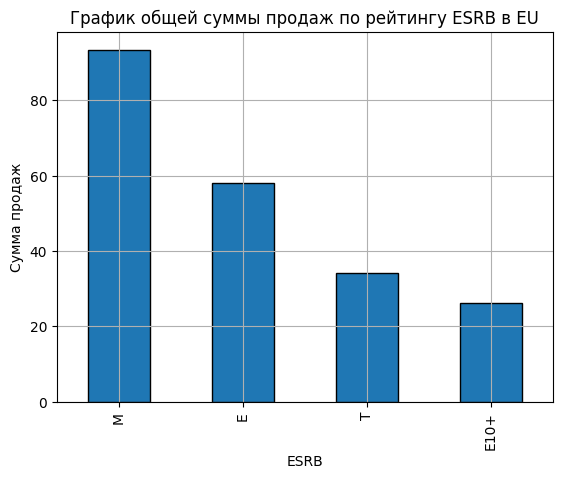

In [104]:
(games_pl.groupby('rating')['eu_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)

   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по рейтингу ESRB в EU')
plt.ylabel('Сумма продаж')
plt.xlabel('ESRB');

Заметно что игры с рейтингом "М" явно имеет приемущество на 30 пунктов от следующих "Е" и "Т". "Е10" оказывается на последнем месте по продажам в данном регионе. Судя по всему предпочтительнее является рейтинг игры "Е".

Общий портрет данного региона, пользователь, который предпочитает платформу PS4 с жанром игры Action и рейтингом "М".

##### Определим для пользователей JP региона топ 5 популярных платформ по продажам.

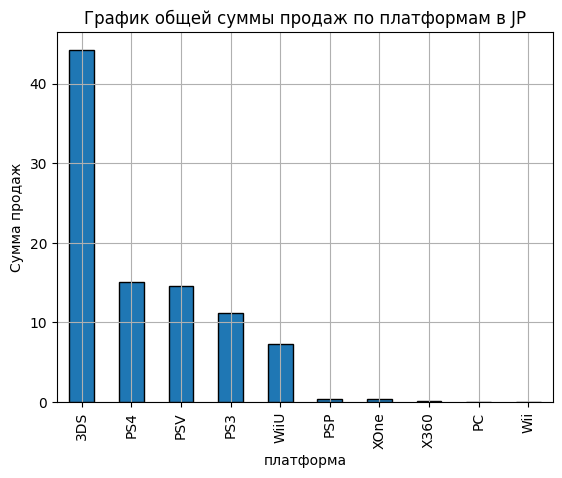

In [105]:
(games_pl.groupby('platform')['jp_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по платформам в JP')
plt.ylabel('Сумма продаж')
plt.xlabel('платформа');

Популярность платформ по продажам снижается примерно на 25 пунктов от лидирующей 3DS с каждой последующей на снижении.

В топ-5 популярных платформ входят с общей суммой продаж 100-175 пунктов за весь период:
- 3DS
- PS4
- PSV
- PS3
- WiiU

Определим для пользователей JP региона топ 5 популярных жанров по продажам.

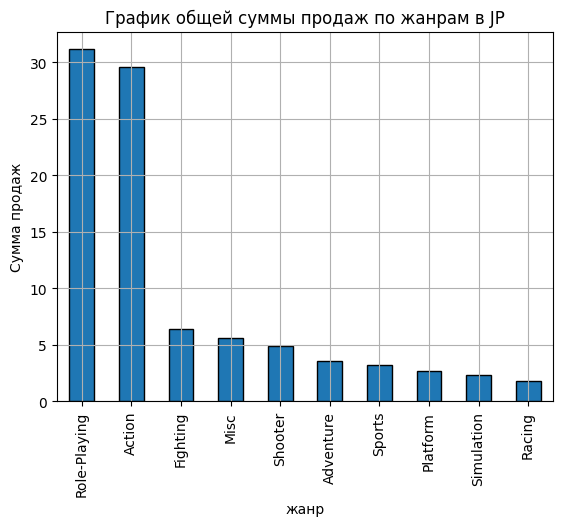

In [106]:
(games_pl.groupby('genre')['jp_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)
 
   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по жанрам в JP')
plt.ylabel('Сумма продаж')
plt.xlabel('жанр');

Жанры Role-Playing и Action сильно лидируют на фоне остальных с общей суммой продаж 30 пунктов,  с резким понижением к третьему жанру по региону выступает Fighting с значением 7 пунктов. Затем идет плавное снижение на 1-2  пункта к жанру Misc далее наблюдается плавное снижение по 1-2 пунктa.

Топ 5 жанров данного региона:
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

Влияет ли рейтинг ESRB на продажи в  регионе JP

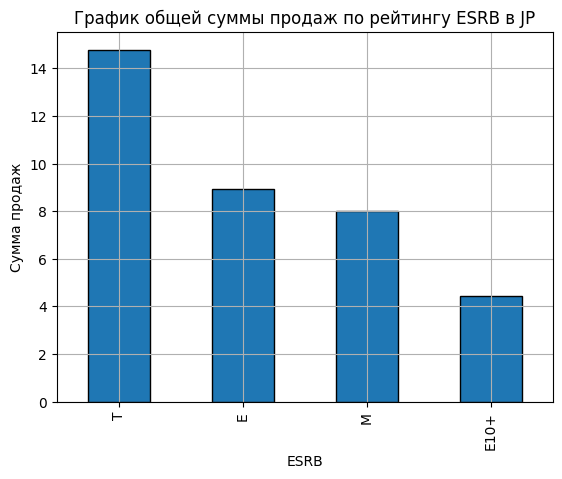

In [107]:
(games_pl.groupby('rating')['jp_sales']
   .sum()
   .sort_values(ascending=False)
   .head(10)

   .plot(kind='bar',
         ec='black',
         grid=True))

plt.title('График общей суммы продаж по рейтингу ESRB в JP')
plt.ylabel('Сумма продаж')
plt.xlabel('ESRB');

Заметно что игры с рейтингом "T"  имеет приемущество на 6 пунктов от следующего "E", затем с плавным понижением идет жанр "М" на 1-2 пункта. "Е10" оказывается на последнем месте по продажам в данном регионе. Судя по всему предпочтительнее является рейтинг игры "Т".

Общий портрет данного региона, пользователь, который предпочитает платформу 3DS с жанром игры Role-Playing и рейтингом "Т".

## Проверка  гипотез

### Гипотеза 

- Нулевая гипотеза : средние пользовательские рейтинги платформ Xbox One и PC  равны.
- Альтернативная гипотеза : средние пользовательские рейтинги платформ Xbox One и PC не равны.

Определим статистическу значимость в 10%, в таком случае можно точно говорить о разнице платформ.

Так как генеральные совокупности не зависят друг от друга и выборочные средние нормально распределены, будем использовать 
двухсторонний метод проверки гипотез ttest_ind(), так как размеры выборок достаточно разные, поставим параметр equal_var=False, потому что разброс может иметь большую разницу.

In [108]:
sample_1 = games_pl.query('platform == "XOne"')['user_score'].dropna()

sample_2 = games_pl.query('platform == "PC"')['user_score'].dropna()

alpha = 0.1 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2,equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


Вероятность получить большую разницу пользовательских оценок между платформами низкая, поэтому можно сказать, что пользовательские рейтинги между платформами  XoOne и PC одинаковые.

### Гипотеза  

- Нулевая гипотеза : средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза : средние пользовательские рейтинги жанров Action и Sports разные.

Определим статистическу значимость в 10%, в таком случае можно точно говорить о разнице жанров.

In [109]:
sample_1 = games_pl.query('genre == "Action"')['user_score'].dropna()

sample_2 = games_pl.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.1 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2,equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вероятность получить одинаковые значения пользовательских оценок низкая, поэтому можно говорить о том, что рейтинги будут разными.

## Вывод


Произведена обработка данных. Привели к нужному регистру, убрали пропуски, поменяли тип ячеек

Определили, что активное начало выпуска компьютерных игр приходится на 1990 год, пикового значения достигает в 2011, но
также отметим промежуточные всплески к 1998 и 2005 годам

Самые популярные платформы за актуальный период: 
- PS4,
- PS3,
- X360,
- 3DS,
- XOne.

В среднем платформы появляются и исчезают за 9-10 лет

Выяснили, что чем больше рейтинг критиков и пользователей, тем больше продаж. Но есть исключения, где рейтинг маленький, но большие продажи 

Самые популярные жанры: Shooter, Sports, Platform, Fighting, Role-Playin

Составили портрет пользователей по регионам. В целом все регионы похожи, только Япония заметно отличается по поведению:

### Составили портреты пользователей для каждого региона:

Северная Америка: 
- пользователь, который предпочитает платформу PS4 с жанром игры Shooter и рейтингом "М"

Европа: 
- пользователь, который предпочитает платформу PS4 с жанром игры Action и рейтингом "М

Япония: 
- пользователь, который предпочитает платформу 3DS с жанром игры Role-Playing и рейтингом "Т"

**Проверка гипотез:**

- Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные.